<a href="https://www.kaggle.com/code/jake2001/google-data-analytics-case-study-1?scriptVersionId=101993885" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Google Data Analytics Case Study #1

Author: JianHui (Jake) Li

Date: 07/26/2022

## Introduction

This is case study #1 from track #1 in the final course of the Google Data Analytics Professional Certificate. I will be following the steps of the data analysis process (ask, prepare, process, analyze, share, act) I learned throughout the courses, and the case study roadmap provided as a guide.

## Background

**About the company:**
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

**Scenario:**
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

To see my complete report, please go [here](https://github.com/JakeLi2001/Google-Data-Analytics-Professional-Certificate/blob/3cc3e8ab27d5f27ce56da55f1e7a60aaadb538df/Case_Study_1/README.md).

In [1]:
# Setting up the environment.
library(tidyverse)
library(skimr)
library(lubridate)
library(scales)
library(RColorBrewer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
# Merging all CSV files into one.
bike_trip_df <- list.files(path = "../input/google-data-analytics-case-study-1-jianhui", full.names = TRUE) %>%
  lapply(read_csv) %>%
  bind_rows

Rows: 729595 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 822410 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 804352 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

In [3]:
# Display the column names of the dataframe.
colnames(bike_trip_df)

# Display the first 6 rows of the dataframe.
head(bike_trip_df)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,NA,NA,NA,NA,41.80,-87.59,41.80,-87.60,member
06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,NA,NA,NA,NA,41.79,-87.59,41.80,-87.60,member
9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,NA,NA,NA,NA,41.80,-87.60,41.79,-87.59,member
B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,NA,NA,NA,NA,41.78,-87.58,41.80,-87.60,member
B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,NA,NA,NA,NA,41.80,-87.59,41.79,-87.59,member
62B943CEAAA420BA,electric_bike,2021-06-03 19:32:01,2021-06-03 19:38:46,NA,NA,NA,NA,41.78,-87.58,41.78,-87.58,member


In [4]:
# Produce a summary of the dataframe.
summary(bike_trip_df)

   ride_id          rideable_type        started_at                 
 Length:5860776     Length:5860776     Min.   :2021-06-01 00:00:38  
 Class :character   Class :character   1st Qu.:2021-07-29 10:43:32  
 Mode  :character   Mode  :character   Median :2021-09-23 17:33:23  
                                       Mean   :2021-10-26 03:44:54  
                                       3rd Qu.:2022-01-14 10:59:12  
                                       Max.   :2022-05-31 23:59:56  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-06-01 00:06:22   Length:5860776     Length:5860776    
 1st Qu.:2021-07-29 11:02:56   Class :character   Class :character  
 Median :2021-09-23 17:49:29   Mode  :character   Mode  :character  
 Mean   :2021-10-26 04:05:36                                        
 3rd Qu.:2022-01-14 11:14:48                                        
 Max.   :2022-06-02 11:35:01      

In [5]:
# Sort the started_at (Date and time when ride started) column by descending order so the most recent dates appear first.
bike_trip_df_cleaned_v0 <- arrange(bike_trip_df, desc(started_at))

# Remove latitudes and longitudes because I won't be using geographic data.
bike_trip_df_cleaned_v1 <- select(bike_trip_df_cleaned_v0, -c(start_lat, start_lng, end_lat, end_lng))

# Rename columns.
bike_trip_df_cleaned_v2 <- rename(bike_trip_df_cleaned_v1, from_station = start_station_name, from_station_id = start_station_id, to_station = end_station_name, to_station_id = end_station_id, casual_or_member = member_casual)

In [6]:
head(bike_trip_df_cleaned_v2)

ride_id,rideable_type,started_at,ended_at,from_station,from_station_id,to_station,to_station_id,casual_or_member
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>
761981AEEA662B35,classic_bike,2022-05-31 23:59:56,2022-06-01 00:04:04,Lincoln Ave & Fullerton Ave,TA1309000058,Sedgwick St & Webster Ave,13191,casual
C4E039D12FA2F959,electric_bike,2022-05-31 23:59:38,2022-06-01 00:05:02,NA,NA,NA,NA,member
A904966008DE7AF1,electric_bike,2022-05-31 23:59:23,2022-06-01 00:00:20,Elston Ave & Wabansia Ave,TA1309000032,Elston Ave & Wabansia Ave,TA1309000032,member
6F542133C328A000,classic_bike,2022-05-31 23:59:19,2022-06-01 00:22:53,Emerald Ave & 31st St,TA1309000055,Federal St & Polk St,SL-008,member
02C62B16DD557A08,electric_bike,2022-05-31 23:59:19,2022-06-01 00:04:12,NA,NA,Clark St & Grace St,TA1307000127,casual
FA9799B96E4FE352,electric_bike,2022-05-31 23:59:13,2022-06-01 00:05:38,NA,NA,Halsted St & Roscoe St,TA1309000025,casual


In [7]:
# Add ride_length, day_of_week, month, season, and time_of_day columns to provide more ways to aggregate data.
bike_trip_df_cleaned_v3 <- bike_trip_df_cleaned_v2 %>%
  mutate(ride_length = round(difftime(ended_at, started_at, units = "mins"), 2))

bike_trip_df_cleaned_v3$day_of_week <- weekdays(as.Date(bike_trip_df_cleaned_v3$started_at))
#bike_trip_df_cleaned_v3$date <- as.Date(bike_trip_df_cleaned_v4$started_at)
#bike_trip_df_cleaned_v3$year <- format(as.Date(bike_trip_df_cleaned_v4$date), "%Y")
#bike_trip_df_cleaned_v3$month <- format(as.Date(bike_trip_df_cleaned_v3$started_at), "%m")

seasons <- c(
  "01" = "Winter", "02" = "Winter",
  "03" = "Spring", "04" = "Spring", "05" = "Spring",
  "06" = "Summer", "07" = "Summer", "08" = "Summer",
  "09" = "Fall", "10" = "Fall", "11" = "Fall",
  "12" = "Winter")
bike_trip_df_cleaned_v3$season <- seasons[format(as.Date(bike_trip_df_cleaned_v3$started_at), "%m")]

breaks <- hour(hm("00:00", "5:00", "11:00", "17:00", "20:00", "23:59"))
labels <- c("Night", "Morning", "Afternoon", "Evening", "Late_Evening")
bike_trip_df_cleaned_v3$time_of_day <- cut(x=hour(bike_trip_df_cleaned_v3$started_at), breaks = breaks, labels = labels, include.lowest=TRUE)
# 00:00 - 06:00 is night
# 06:00 - 12:00 is morning
# 12:00 - 18:00 is afternoon
# 18:00 - 21:00 is evening
# 21:00 - 23:59 is late evening

In [8]:
colnames(bike_trip_df_cleaned_v3)

head(bike_trip_df_cleaned_v3)

[1] "ride_id"          "rideable_type"    "started_at"       "ended_at"        
 [5] "from_station"     "from_station_id"  "to_station"       "to_station_id"   
 [9] "casual_or_member" "ride_length"      "day_of_week"      "season"          
[13] "time_of_day"

ride_id,rideable_type,started_at,ended_at,from_station,from_station_id,to_station,to_station_id,casual_or_member,ride_length,day_of_week,season,time_of_day
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<drtn>,<chr>,<chr>,<fct>
761981AEEA662B35,classic_bike,2022-05-31 23:59:56,2022-06-01 00:04:04,Lincoln Ave & Fullerton Ave,TA1309000058,Sedgwick St & Webster Ave,13191,casual,4.13 mins,Tuesday,Spring,Late_Evening
C4E039D12FA2F959,electric_bike,2022-05-31 23:59:38,2022-06-01 00:05:02,NA,NA,NA,NA,member,5.40 mins,Tuesday,Spring,Late_Evening
A904966008DE7AF1,electric_bike,2022-05-31 23:59:23,2022-06-01 00:00:20,Elston Ave & Wabansia Ave,TA1309000032,Elston Ave & Wabansia Ave,TA1309000032,member,0.95 mins,Tuesday,Spring,Late_Evening
6F542133C328A000,classic_bike,2022-05-31 23:59:19,2022-06-01 00:22:53,Emerald Ave & 31st St,TA1309000055,Federal St & Polk St,SL-008,member,23.57 mins,Tuesday,Spring,Late_Evening
02C62B16DD557A08,electric_bike,2022-05-31 23:59:19,2022-06-01 00:04:12,NA,NA,Clark St & Grace St,TA1307000127,casual,4.88 mins,Tuesday,Spring,Late_Evening
FA9799B96E4FE352,electric_bike,2022-05-31 23:59:13,2022-06-01 00:05:38,NA,NA,Halsted St & Roscoe St,TA1309000025,casual,6.42 mins,Tuesday,Spring,Late_Evening


In [9]:
# Structure of the dataframe.
str(bike_trip_df_cleaned_v3)

tibble [5,860,776 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id         : chr [1:5860776] "761981AEEA662B35" "C4E039D12FA2F959" "A904966008DE7AF1" "6F542133C328A000" ...
 $ rideable_type   : chr [1:5860776] "classic_bike" "electric_bike" "electric_bike" "classic_bike" ...
 $ started_at      : POSIXct[1:5860776], format: "2022-05-31 23:59:56" "2022-05-31 23:59:38" ...
 $ ended_at        : POSIXct[1:5860776], format: "2022-06-01 00:04:04" "2022-06-01 00:05:02" ...
 $ from_station    : chr [1:5860776] "Lincoln Ave & Fullerton Ave" NA "Elston Ave & Wabansia Ave" "Emerald Ave & 31st St" ...
 $ from_station_id : chr [1:5860776] "TA1309000058" NA "TA1309000032" "TA1309000055" ...
 $ to_station      : chr [1:5860776] "Sedgwick St & Webster Ave" NA "Elston Ave & Wabansia Ave" "Federal St & Polk St" ...
 $ to_station_id   : chr [1:5860776] "13191" NA "TA1309000032" "SL-008" ...
 $ casual_or_member: chr [1:5860776] "casual" "member" "member" "member" ...
 $ ride_length     : 'difftime' num [1:5860

In [10]:
# Change the data type of rideable_type, casual_or_member, day_of_week, and season columns to factor because they are categorical data.
bike_trip_df_cleaned_v3$rideable_type <- as.factor(bike_trip_df_cleaned_v3$rideable_type)
bike_trip_df_cleaned_v3$casual_or_member <- as.factor(bike_trip_df_cleaned_v3$casual_or_member)
bike_trip_df_cleaned_v3$day_of_week <- as.factor(bike_trip_df_cleaned_v3$day_of_week)
bike_trip_df_cleaned_v3$season <- as.factor(bike_trip_df_cleaned_v3$season)

# Order the categorical levels of day_of_week, season and time_of_day columns.
bike_trip_df_cleaned_v3$day_of_week <- ordered(bike_trip_df_cleaned_v3$day_of_week, levels=c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
bike_trip_df_cleaned_v3$season <- ordered(bike_trip_df_cleaned_v3$season, levels=c("Spring", "Summer", "Fall", "Winter"))
bike_trip_df_cleaned_v3$time_of_day <- ordered(bike_trip_df_cleaned_v3$time_of_day, levels=c("Morning", "Afternoon", "Evening", "Late_Evening", "Night"))

# Change the data type of the ride_length column to numeric and rename it.
bike_trip_df_cleaned_v3$ride_length <- as.numeric(bike_trip_df_cleaned_v3$ride_length)
bike_trip_df_cleaned_v3 <- rename(bike_trip_df_cleaned_v3, ride_length_in_mins = ride_length)

In [11]:
str(bike_trip_df_cleaned_v3)

tibble [5,860,776 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id            : chr [1:5860776] "761981AEEA662B35" "C4E039D12FA2F959" "A904966008DE7AF1" "6F542133C328A000" ...
 $ rideable_type      : Factor w/ 3 levels "classic_bike",..: 1 3 3 1 3 3 3 3 1 3 ...
 $ started_at         : POSIXct[1:5860776], format: "2022-05-31 23:59:56" "2022-05-31 23:59:38" ...
 $ ended_at           : POSIXct[1:5860776], format: "2022-06-01 00:04:04" "2022-06-01 00:05:02" ...
 $ from_station       : chr [1:5860776] "Lincoln Ave & Fullerton Ave" NA "Elston Ave & Wabansia Ave" "Emerald Ave & 31st St" ...
 $ from_station_id    : chr [1:5860776] "TA1309000058" NA "TA1309000032" "TA1309000055" ...
 $ to_station         : chr [1:5860776] "Sedgwick St & Webster Ave" NA "Elston Ave & Wabansia Ave" "Federal St & Polk St" ...
 $ to_station_id      : chr [1:5860776] "13191" NA "TA1309000032" "SL-008" ...
 $ casual_or_member   : Factor w/ 2 levels "casual","member": 1 2 2 2 1 1 2 1 2 1 ...
 $ ride_length_in_mins: num [1

In [12]:
summary(bike_trip_df_cleaned_v3)

   ride_id                rideable_type       started_at                 
 Length:5860776     classic_bike :3217737   Min.   :2021-06-01 00:00:38  
 Class :character   docked_bike  : 274447   1st Qu.:2021-07-29 10:43:32  
 Mode  :character   electric_bike:2368592   Median :2021-09-23 17:33:23  
                                            Mean   :2021-10-26 03:44:54  
                                            3rd Qu.:2022-01-14 10:59:12  
                                            Max.   :2022-05-31 23:59:56  
                                                                         
    ended_at                   from_station       from_station_id   
 Min.   :2021-06-01 00:06:22   Length:5860776     Length:5860776    
 1st Qu.:2021-07-29 11:02:56   Class :character   Class :character  
 Median :2021-09-23 17:49:29   Mode  :character   Mode  :character  
 Mean   :2021-10-26 04:05:36                                        
 3rd Qu.:2022-01-14 11:14:48                                   

In [13]:
# I noticed the minimum of ride length is negative which could be caused when start_time > end_time. Therefore, I am going to remove rows where the started_at date is greater than the ended_at date.
bike_trip_df_cleaned_v4 <- filter(bike_trip_df_cleaned_v3, !started_at > ended_at)

# Also remove rows where ride_length is equal to 0 minutes.
bike_trip_df_cleaned_v4 <- filter(bike_trip_df_cleaned_v4, ride_length_in_mins != 0)

In [14]:
summary(bike_trip_df_cleaned_v4)

   ride_id                rideable_type       started_at                 
 Length:5860130     classic_bike :3217479   Min.   :2021-06-01 00:00:38  
 Class :character   docked_bike  : 274440   1st Qu.:2021-07-29 10:42:03  
 Mode  :character   electric_bike:2368211   Median :2021-09-23 17:33:16  
                                            Mean   :2021-10-26 03:46:57  
                                            3rd Qu.:2022-01-14 11:14:06  
                                            Max.   :2022-05-31 23:59:56  
                                                                         
    ended_at                   from_station       from_station_id   
 Min.   :2021-06-01 00:06:22   Length:5860130     Length:5860130    
 1st Qu.:2021-07-29 11:02:00   Class :character   Class :character  
 Median :2021-09-23 17:49:24   Mode  :character   Mode  :character  
 Mean   :2021-10-26 04:07:39                                        
 3rd Qu.:2022-01-14 11:29:08                                   

In [15]:
# Disable warming from summarize/summaries since it doesn't affect our result.
options(dplyr.summarise.inform = FALSE)

In [16]:
# Summary of the ride_length_in_mins column.
summary(bike_trip_df_cleaned_v4$ride_length_in_mins)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.02     6.37    11.35    20.69    20.60 55944.15 

In [17]:
# From the previous results, we can see the maximum ride length is 55944.15 minutes (about 932 hours) which is unrealistic. Therefore, I decided to use the interquartile range method to define outliers and remove them. Any value above the upper fence will be considered outliers.
# Upper fence: Q3 + (1.5 * IQR)
# IQR = Q3 - Q1
20.60 + (1.5 * (20.60 - 6.37)) # Upper limit for ride length

[1] 41.945

In [18]:
# Also, the minimum ride length is 0.02 minutes or 1.2 seconds which is unrealistic as well. The interquartile range method doesn't work for the lower fence because I will get a negative number. Hence, I will take the simple approach. Any value less than 0.025 percentile (bottom 2.5%) will be considered as outliers.
quantile(bike_trip_df_cleaned_v4$ride_length_in_mins, 0.025)

2.5% 
1.68

In [19]:
# Based on value from previous steps and some research on the company's bike usage time limit, It's safe to assume that ride length more than 45 minutes or less than 1.68 minutes are outliers and will be removed and saved to another dataframe.
ride_length_outliers <- filter(bike_trip_df_cleaned_v4, ride_length_in_mins > 45 | ride_length_in_mins < 1.68)
bike_trip_df_final <- filter(bike_trip_df_cleaned_v4, ride_length_in_mins <= 45 & ride_length_in_mins >= 1.68)

# Save final dataframe and outlier dataframe to output
write.csv(bike_trip_df_final, "bike_trip_df_final.csv")
write.csv(ride_length_outliers, "ride_length_outliers.csv")

In [20]:
# Number of rides, average, minimum, median, and maximum of ride length in minutes by customer type.
bike_trip_df_final %>%
  group_by(casual_or_member) %>%
  summarize(number_of_rides = n(),
            average_ride_length = mean(ride_length_in_mins),
            minimum_ride_length = min(ride_length_in_mins),
            median_ride_length = median(ride_length_in_mins),
            maximum_ride_length = max(ride_length_in_mins))

casual_or_member,number_of_rides,average_ride_length,minimum_ride_length,median_ride_length,maximum_ride_length
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
casual,2189030,16.15968,1.68,13.63,45
member,3150040,11.85977,1.68,9.22,45


In [21]:
# Number of rides, average, minimum, median, and maximum of ride length in minutes by customer type per season.
bike_trip_df_final %>%
  group_by(season, casual_or_member) %>%
  summarize(number_of_rides = n(),
            average_ride_length = mean(ride_length_in_mins))

season,casual_or_member,number_of_rides,average_ride_length
<ord>,<fct>,<int>,<dbl>
Spring,casual,423099,15.85046
Spring,member,754447,11.40701
Summer,casual,1028024,17.00123
Summer,member,1078923,12.99853
Fall,casual,637486,15.48214
Fall,member,974928,11.53999
Winter,casual,100421,13.14868
Winter,member,341742,10.17637


In [22]:
# Number of rides and average ride length in minutes by customer type per month.
bike_trip_df_final %>%
  group_by(month = lubridate::floor_date(started_at, 'month'), casual_or_member) %>% 
  summarize(count = n(),
            average_ride_length = mean(ride_length_in_mins))

month,casual_or_member,count,average_ride_length
<dttm>,<fct>,<int>,<dbl>
2021-06-01,casual,305291,17.32524
2021-06-01,member,342197,13.22403
2021-07-01,casual,371109,17.02258
2021-07-01,member,362854,12.99189
2021-08-01,casual,351624,16.69737
2021-08-01,member,373872,12.79857
2021-09-01,casual,313148,16.26535
2021-09-01,member,375061,12.46958
2021-10-01,casual,226703,15.24888


In [23]:
# Number of rides and average ride length in minutes by customer type per day of week and time of day.
bike_trip_df_final %>%
  group_by(casual_or_member, day_of_week, time_of_day) %>%
  summarize(number_of_rides = n(),
            average_ride_length = mean(ride_length_in_mins))

casual_or_member,day_of_week,time_of_day,number_of_rides,average_ride_length
<fct>,<ord>,<ord>,<int>,<dbl>
casual,Monday,Morning,48862,14.91957
casual,Monday,Afternoon,114614,16.99062
casual,Monday,Evening,54993,15.81554
casual,Monday,Late_Evening,24344,15.02706
casual,Monday,Night,13049,15.10274
casual,Tuesday,Morning,48715,13.71365
casual,Tuesday,Afternoon,106722,15.85772
casual,Tuesday,Evening,60624,15.18945
casual,Tuesday,Late_Evening,27566,14.28058


In [24]:
# Number of rides and average ride length in minutes by customer type per time of day.
bike_trip_df_final %>%
  group_by(time_of_day, casual_or_member) %>%
  summarize(number_of_rides = n(),
            average_ride_length = mean(ride_length_in_mins))

time_of_day,casual_or_member,number_of_rides,average_ride_length
<ord>,<fct>,<int>,<dbl>
Morning,casual,399372,15.20112
Morning,member,862258,11.29610
Afternoon,casual,960054,17.11201
Afternoon,member,1329751,12.15122
Evening,casual,444598,15.90081
Evening,member,605847,12.18137
Late_Evening,casual,246597,15.24903
Late_Evening,member,235750,11.75897
Night,casual,138409,14.77391


In [25]:
# Rideable type frequency and its average ride length in minutes by customer type.
bike_trip_df_final %>%
  group_by(casual_or_member, rideable_type) %>%
  summarize(count = n(),
            average_ride_length = mean(ride_length_in_mins))

casual_or_member,rideable_type,count,average_ride_length
<fct>,<fct>,<int>,<dbl>
casual,classic_bike,1061186,16.47923
casual,docked_bike,188242,21.75467
casual,electric_bike,939602,14.67788
member,classic_bike,1901290,12.29726
member,electric_bike,1248750,11.19366


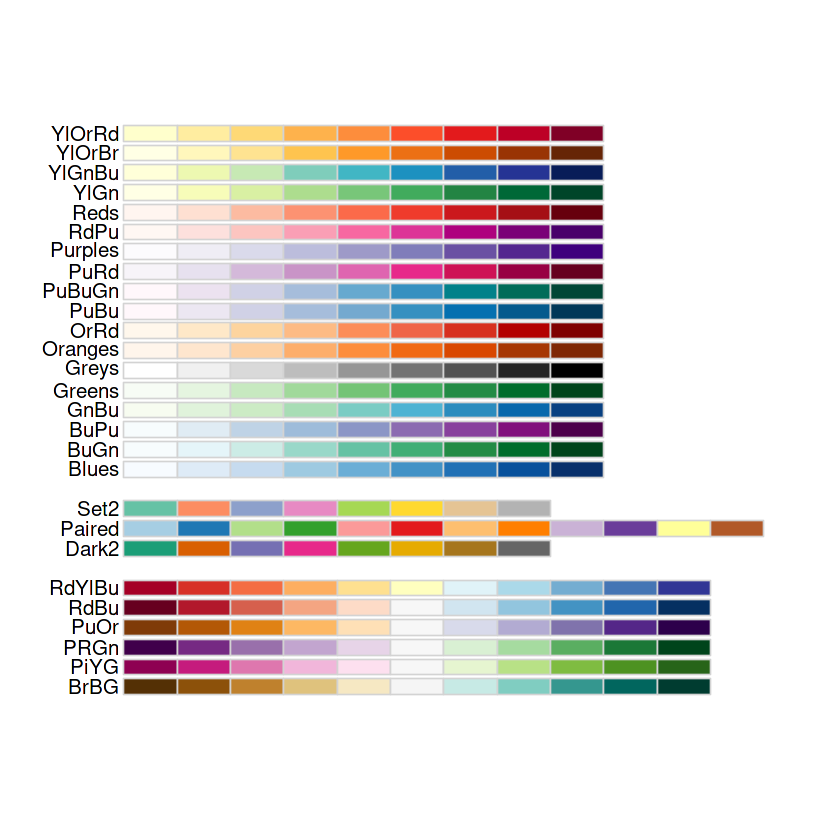

In [26]:
# Display color palettes that are color blind friendly.
display.brewer.all(colorblindFriendly = TRUE)

# Adjust plot size
options(repr.plot.width=10, repr.plot.height = 7)

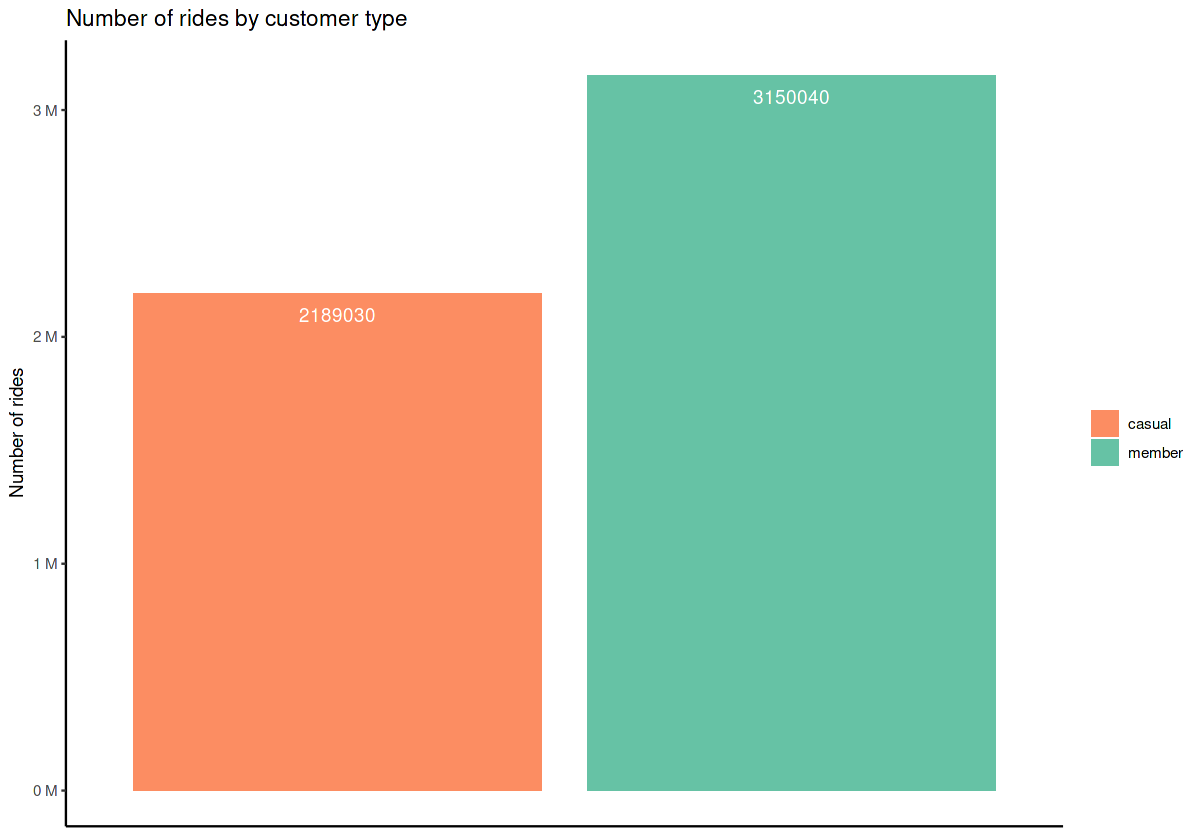

In [27]:
ride_count <- ggplot(bike_trip_df_final, aes(x = casual_or_member, fill = casual_or_member)) +
  geom_bar() +
  labs(title = "Number of rides by customer type", y = "Number of rides") +
  scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) +
  geom_text(aes(label = ..count..), stat = "count", vjust = 2, colour = "white") +
  scale_fill_brewer(palette = "Set2", direction = -1) +
  theme_classic() +
  theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank(), legend.title = element_blank())

ride_count

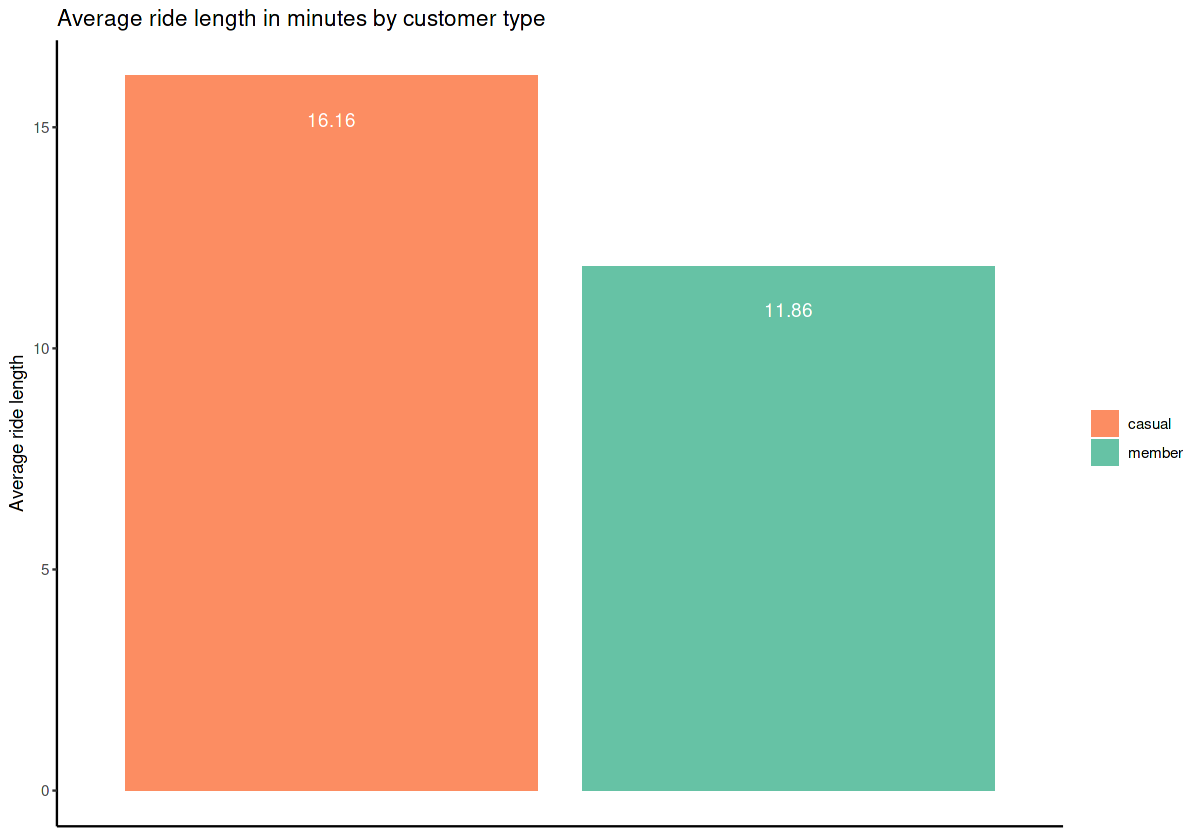

In [28]:
avg_ride_length <- bike_trip_df_final %>%
  group_by(casual_or_member) %>%
  summarize(average_ride_length = mean(ride_length_in_mins)) %>% 
  ggplot(aes(x = casual_or_member, y = average_ride_length, fill = casual_or_member)) +
  labs(title = "Average ride length in minutes by customer type", y = "Average ride length") +
  geom_bar(stat = "summary", fun = "mean") +
  geom_text(aes(label = round(average_ride_length, 2)), nudge_y = -1, colour = "white") +
  scale_fill_brewer(palette = "Set2", direction = -1) +
  theme_classic() + theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank(), legend.title = element_blank())

avg_ride_length

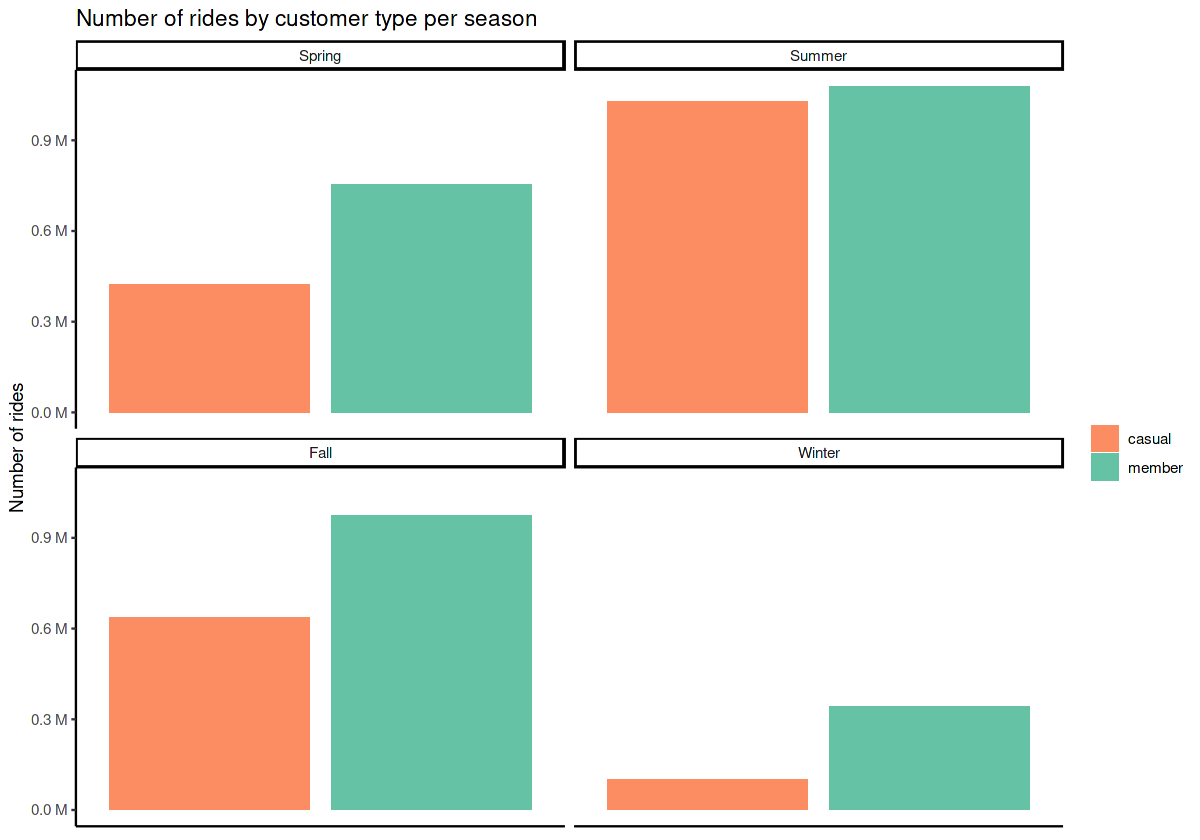

In [29]:
ride_count_per_season <- ggplot(bike_trip_df_final, aes(x = casual_or_member, fill = casual_or_member)) +
  geom_bar() +
  labs(title = "Number of rides by customer type per season", y = "Number of rides") +
  scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) +
  scale_fill_brewer(palette = "Set2", direction = -1) +
  facet_wrap(~season) +
  theme_classic() +
  theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank(), legend.title = element_blank())

ride_count_per_season

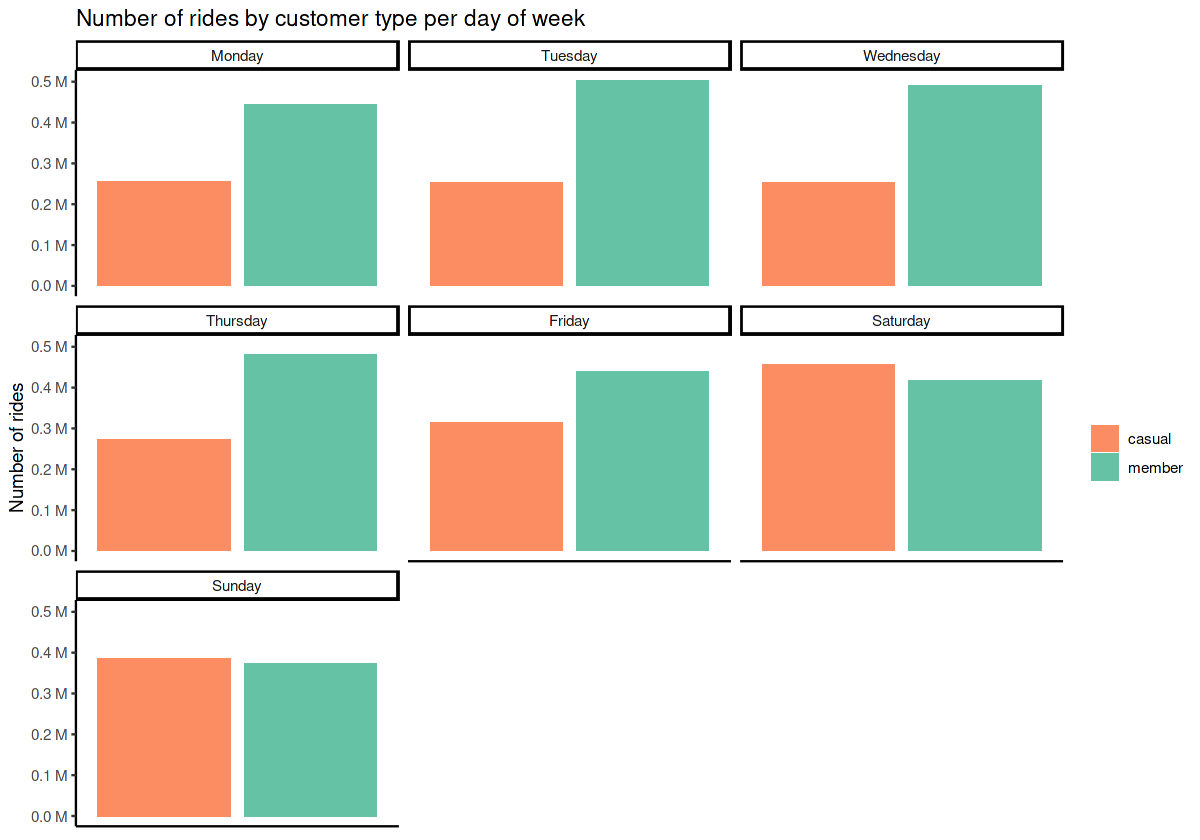

In [30]:
ride_count_by_day_of_week <- ggplot(bike_trip_df_final, aes(x = casual_or_member, fill = casual_or_member)) +
  geom_bar() +
  labs(title = "Number of rides by customer type per day of week", y = "Number of rides") +
  scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) +
  scale_fill_brewer(palette = "Set2", direction = -1) +
  facet_wrap(~day_of_week) +
  theme_classic() +
  theme(axis.title.x = element_blank(), axis.text.x = element_blank(), axis.ticks.x = element_blank(), legend.title = element_blank())

ride_count_by_day_of_week

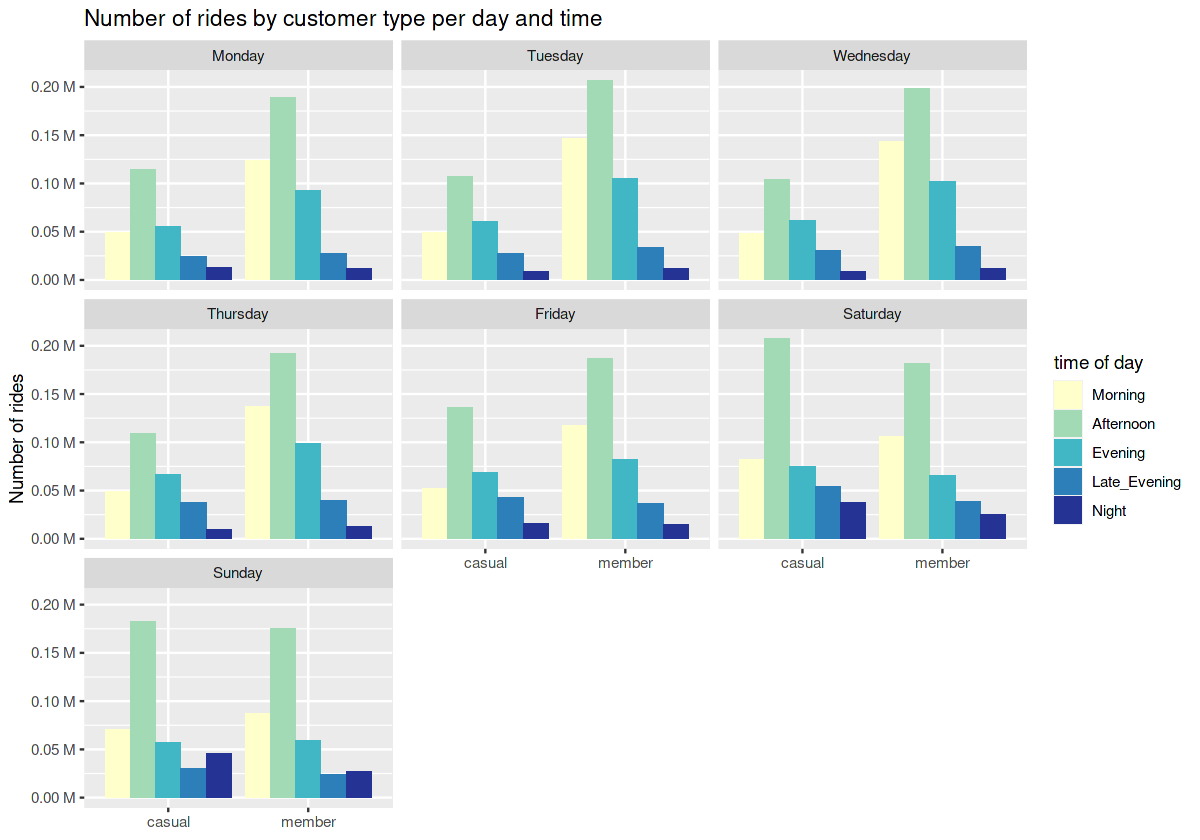

In [31]:
ride_count_per_day_and_time <- ggplot(bike_trip_df_final, aes(x = casual_or_member, fill = time_of_day)) +
  geom_bar(position = "dodge") +
  labs(title = "Number of rides by customer type per day and time", y = "Number of rides") +
  guides(fill = guide_legend(title = "time of day")) +
  scale_y_continuous(labels = unit_format(unit = "M", scale = 1e-6)) +
  scale_fill_brewer(palette = "YlGnBu") +
  facet_wrap(~day_of_week) +
  theme(axis.title.x = element_blank())

ride_count_per_day_and_time
# Reminder:
# 00:00 - 06:00 is night
# 06:00 - 12:00 is morning
# 12:00 - 18:00 is afternoon
# 18:00 - 21:00 is evening
# 21:00 - 23:59 is late evening

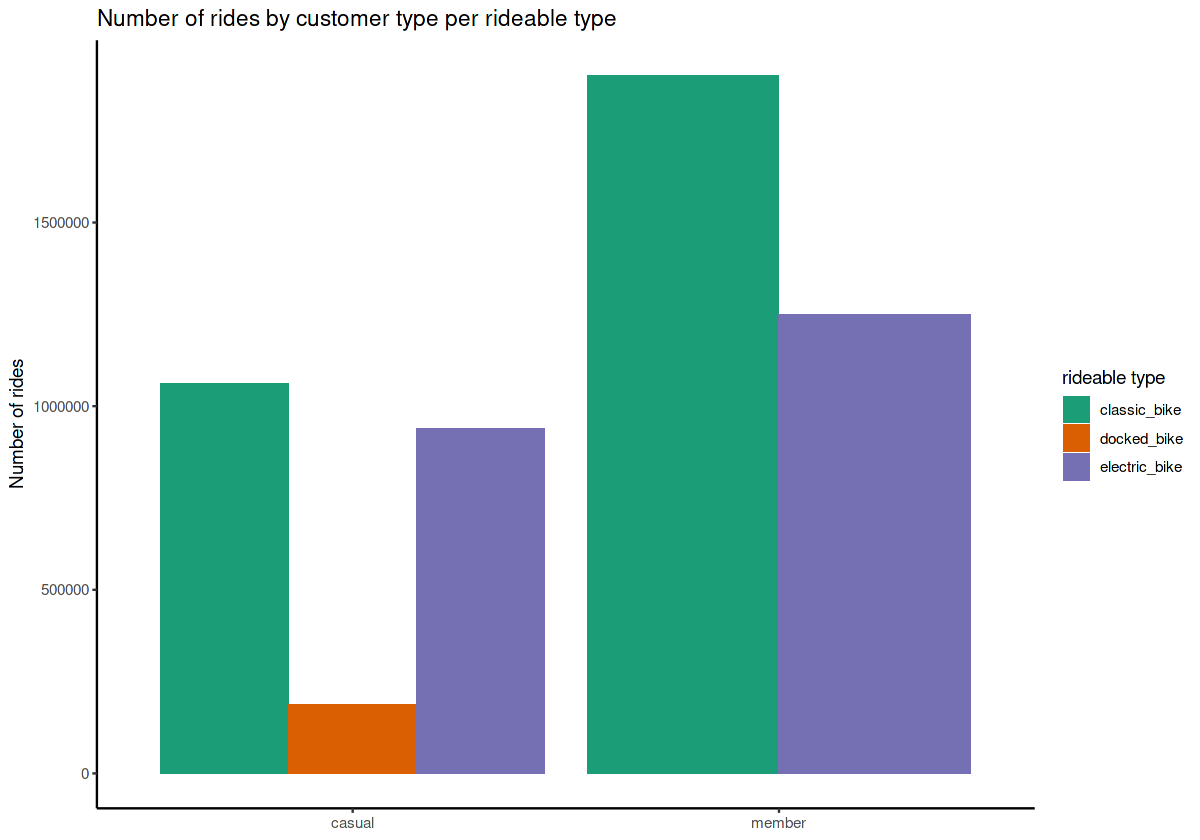

In [32]:
rideable_type_count <- ggplot(bike_trip_df_final, aes(x = casual_or_member, fill = rideable_type)) +
  geom_bar(position = "dodge") +
  labs(title = "Number of rides by customer type per rideable type", y = "Number of rides") +
  guides(fill = guide_legend(title = "rideable type")) +
  scale_fill_brewer(palette = "Dark2") +
  theme_classic() +
  theme(axis.title.x = element_blank())

rideable_type_count

In [33]:
# Save all visualizations to output
ggsave("ride_count.png", plot = ride_count, height=4, width=6)
ggsave("avg_ride_length.png", plot = avg_ride_length, height=4, width=6)
ggsave("ride_count_per_season.png", plot = ride_count_per_season, height=7, width=8)
ggsave("ride_count_by_day_of_week.png", plot = ride_count_by_day_of_week, height=7, width=10)
ggsave("ride_count_per_day_and_time.png", plot = ride_count_per_day_and_time, height=7, width=10)
ggsave("rideable_type_count.png", plot = rideable_type_count, height=4, width=7)